<a href="https://colab.research.google.com/github/amarbtsingh/first-contributions/blob/main/01_PyTorch_Model_Train_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
# Import
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check torch version
torch.__version__

'2.1.0+cu121'

In [107]:
# Check for availability of GPU and set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [108]:
# Create some data using the linear regression formula of y = weight*X + bias
weight = 0.7
bias = 0.3

# Start, end , step
start = 0
end = 1
step = 0.02

# Create input data and labels ( features and labels)
X = torch.arange(start= start,
                 end= end,
                 step= step).unsqueeze(dim= 1)
y = weight * X + bias

In [109]:
# Split data into train and test
train_size = int(0.8 * len(X))


X_train, X_test = X[ : train_size], X[train_size : ]
y_train, y_test = y[ : train_size], y[train_size : ]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

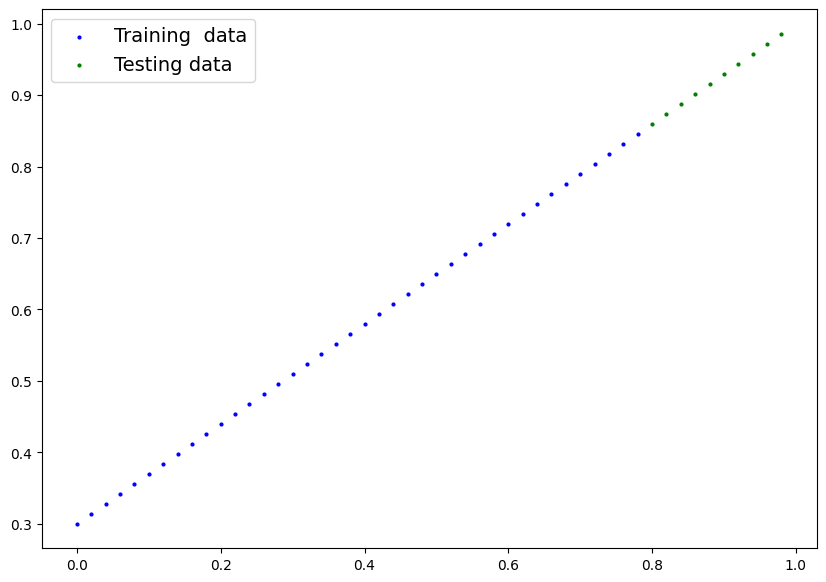

In [110]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in Blue
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training  data")

  # Plot test data in Green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show Legend
  plt.legend(prop={"size": 14})

plot_predictions()

In [111]:
# Create a LinearRegressionModel

from torch import nn

class LinearRegressionModel_V2(nn.Module):
  def __init__(self):
    super().__init__()

    # Pararameters using nn.Linear() for creating model parameters / also called linear layer, linear transform, dense layer, fully connected, probing
    self.linear_layer = nn.Linear(in_features= 1,
                            out_features= 1)

  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input tensor
    return self.linear_layer(x)

# Set Random Seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

# Create a model object
model_1 = LinearRegressionModel_V2()
model_1 , model_1.state_dict()

(LinearRegressionModel_V2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [112]:
# Check the model's current device
next(model_1.parameters()).device

device(type='cpu')

In [113]:
# Set the device to use the target device
model_1.to(device) # In case GPU is avilable, move the model to use its faster processing, else use 'cpu'
next(model_1.parameters()).device

device(type='cpu')

In [114]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE - Mean Absolute Loss

# Setup optimizer function
optimizer = torch.optim.SGD(params= model_1.parameters(), lr= 0.01)

In [115]:
# Write training loop
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

# Put data on the target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

epoch_count = []
train_loss_vals = []
test_loss_vals = []

epochs = 200

for epoch in range(epochs):
  model_1.train()

  # 1. Do the forard pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero Grad
  optimizer.zero_grad() # Resets the gradients all the optimised tensors, prepares the model for the next epoch run

  # 4. Perform backword propogation
  loss.backward()

  # 5. Optimiser step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # Print to see progress
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss {test_loss} ")
    epoch_count.append(epoch) # Trace each epoch
    train_loss_vals.append(loss.detach().numpy())
    test_loss_vals.append(test_loss.numpy())


Epoch: 0 | Loss: 0.5551779866218567 | Test Loss 0.5739762187004089 
Epoch: 10 | Loss: 0.4399680495262146 | Test Loss 0.4392663538455963 
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss 0.30455657839775085 
Epoch: 30 | Loss: 0.20954827964305878 | Test Loss 0.16984674334526062 
Epoch: 40 | Loss: 0.09433844685554504 | Test Loss 0.03513689711689949 
Epoch: 50 | Loss: 0.023886386305093765 | Test Loss 0.04784906655550003 
Epoch: 60 | Loss: 0.0199567973613739 | Test Loss 0.04580312222242355 
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss 0.0375305712223053 
Epoch: 80 | Loss: 0.013089170679450035 | Test Loss 0.029944902285933495 
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss 0.02167237363755703 
Epoch: 100 | Loss: 0.006215679459273815 | Test Loss 0.014086711220443249 
Epoch: 110 | Loss: 0.002787243574857712 | Test Loss 0.005814164876937866 
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss 0.013801807537674904 
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss 0.013801807537674

In [116]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

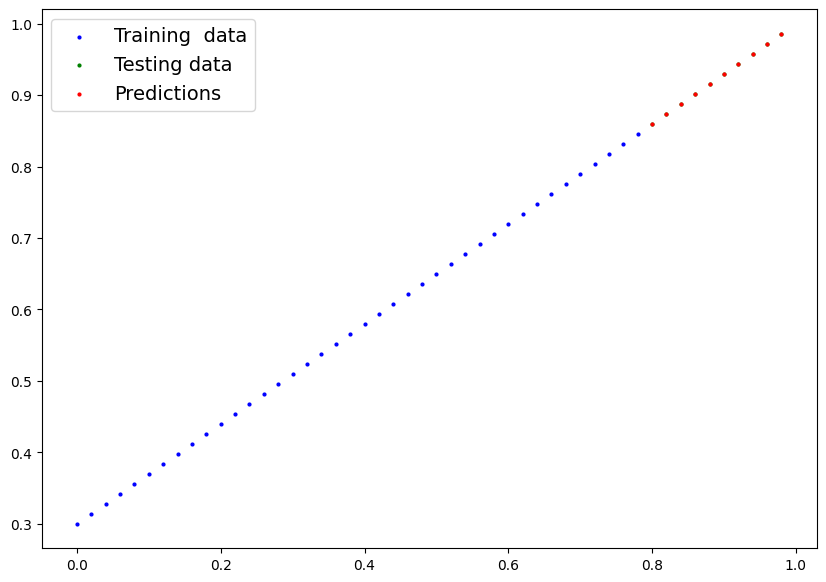

In [117]:
preds = test_pred.detach().numpy()
plot_predictions(predictions= test_pred)

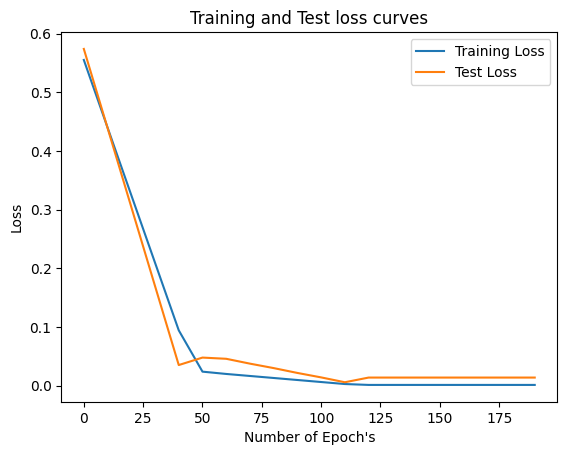

In [118]:
# Plot the train vs test loss curve
#(epoch_count, train_loss_values, test_loss_values)
plt.plot(epoch_count, train_loss_vals, label= "Training Loss")
plt.plot(epoch_count, test_loss_vals, label= "Test Loss")
plt.title("Training and Test loss curves")
plt.xlabel("Number of Epoch's")
plt.ylabel("Loss")
plt.legend()

In [122]:
from genericpath import exists
# Saving the model
from pathlib import Path

# 1. Create a 'models' directory if it doesn't exists
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents= True, exist_ok= True)

# 2. Create a model name and model save path
MODEL_NAME = '01_PyTorch_workflow_model_01.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save model
torch.save(obj= model_1.state_dict(), f= MODEL_SAVE_PATH)

In [ ]:
# Loading the model
saved_state_dict = torch.load(f= MODEL_SAVE_PATH) # Load the saved state_dict of model_1
model_2 = LinearRegressionModel_V2()  # Instantiate a new model
model_2.load_state_dict(state_dict= saved_state_dict) # Load the saved state_dict in the new model object
model_2.state_dict()

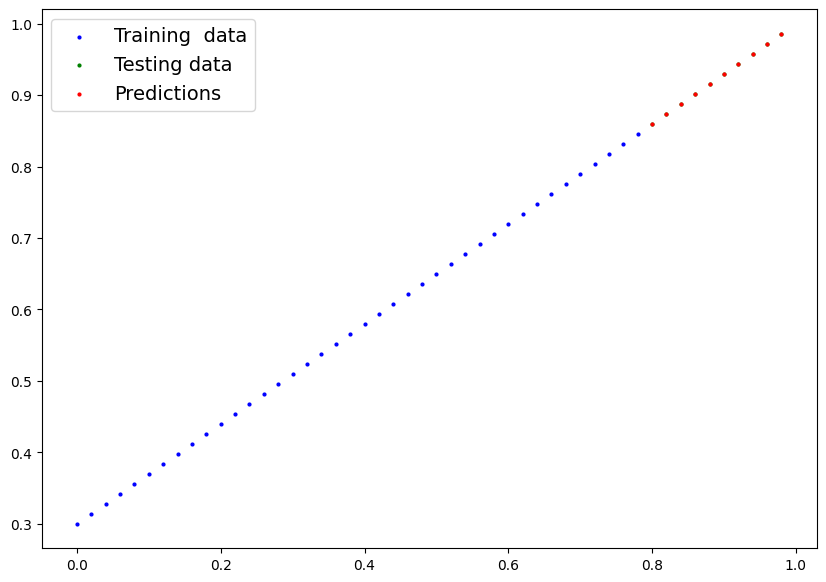

In [129]:
# Test the new model
y_pred_2 = model_2(X_test)

y_pred_plot = y_pred_2.to(device)
y_pred_plot = y_pred_plot.detach().numpy()
plot_predictions(predictions= y_pred_plot)